_Disclaimer_: Was done in spare time without any proprietary resources and on own initiative by Nikita Kulikov in april 2023

In [ ]:
!pip install numpy numba matplotlib scipy

In [ ]:
import numpy as np
from numba import *

In [ ]:
from fdf import compute_fourier, evaluate_fourier

In [3]:
nx = int(1e5)
xs = np.linspace(-1, 1, nx)
ys = np.clip(np.exp(-27 * (xs - 0.9)**2) + np.exp(-100 * (xs + 0.8)**2) + np.exp(-100 * (xs - 0.1)**2), 0.0, 1.0)
zs = np.clip(np.exp(-15 * (xs + 0.4)**2) + np.exp(-100 * (xs - 0.3)**2), 0.0, 1.0)

In [4]:
import matplotlib.pyplot as plt

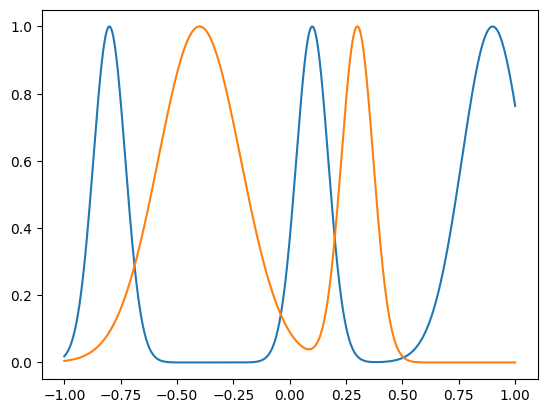

In [5]:
plt.plot(xs, ys)
plt.plot(xs, zs)

In [6]:
cum_ys, cum_zs = np.cumsum(ys), np.cumsum(zs)
min_ys, max_ys = np.min(cum_ys), np.max(cum_ys)
min_zs, max_zs = np.min(cum_zs), np.max(cum_zs)

In [7]:
yc, zc = int(1e6), int(1.1e6)

In [8]:
rng = np.random.MT19937(777)
gen = np.random.Generator(rng)
ys_proj = gen.uniform(min_ys, max_ys, size=yc)
zs_proj = gen.uniform(min_zs, max_zs, size=zc)

In [9]:
xys = np.interp(ys_proj, cum_ys, xs)
xzs = np.interp(zs_proj, cum_zs, xs)

(array([1.4500e+02, 1.9000e+02, 2.7400e+02, 3.6100e+02, 4.4300e+02,
        5.4700e+02, 7.4000e+02, 8.6800e+02, 1.1310e+03, 1.3430e+03,
        1.7120e+03, 2.1440e+03, 2.6740e+03, 3.1860e+03, 3.7740e+03,
        4.3590e+03, 5.2630e+03, 6.1900e+03, 7.3110e+03, 8.2760e+03,
        9.5340e+03, 1.0791e+04, 1.2094e+04, 1.3657e+04, 1.4852e+04,
        1.6654e+04, 1.8052e+04, 1.9370e+04, 2.0791e+04, 2.2411e+04,
        2.3364e+04, 2.4655e+04, 2.5847e+04, 2.6620e+04, 2.6970e+04,
        2.7860e+04, 2.7788e+04, 2.8128e+04, 2.7793e+04, 2.7296e+04,
        2.6907e+04, 2.6174e+04, 2.5020e+04, 2.4226e+04, 2.2711e+04,
        2.1441e+04, 1.9762e+04, 1.8397e+04, 1.6881e+04, 1.5454e+04,
        1.3722e+04, 1.2522e+04, 1.1135e+04, 9.6660e+03, 8.7560e+03,
        7.3140e+03, 6.4110e+03, 5.4920e+03, 4.6750e+03, 3.9720e+03,
        3.2880e+03, 2.7160e+03, 2.2290e+03, 1.8970e+03, 1.5020e+03,
        1.2340e+03, 1.0450e+03, 1.0380e+03, 1.3020e+03, 1.7260e+03,
        2.5140e+03, 3.7650e+03, 5.6100e+03, 8.19

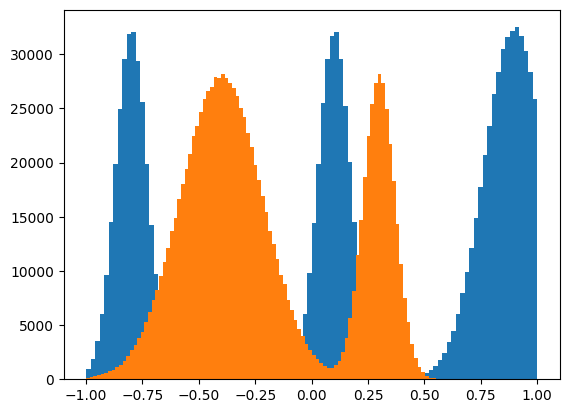

In [10]:
plt.hist(xys, bins = 100)
plt.hist(xzs, bins = 100)

In [11]:
nh = 64

In [12]:
yfourier = compute_fourier(xys, nh)
zfourier = compute_fourier(xzs, nh)

In [13]:
rey, imy = yfourier[0] / yfourier[0][0], yfourier[1] / yfourier[0][0]
rez, imz = zfourier[0] / yfourier[0][0], zfourier[1] / yfourier[0][0]

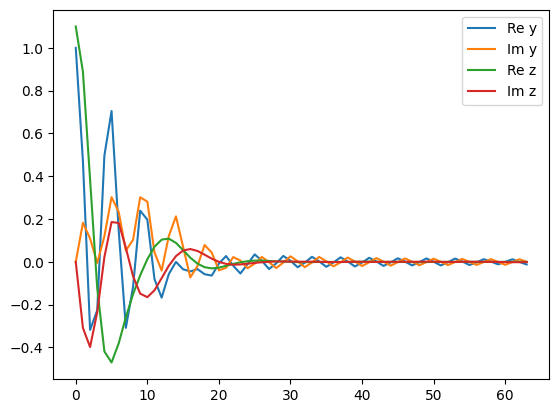

In [14]:
plt.plot(rey, label='Re y')
plt.plot(imy, label='Im y')
plt.plot(rez, label='Re z')
plt.plot(imz, label='Im z')
plt.legend()

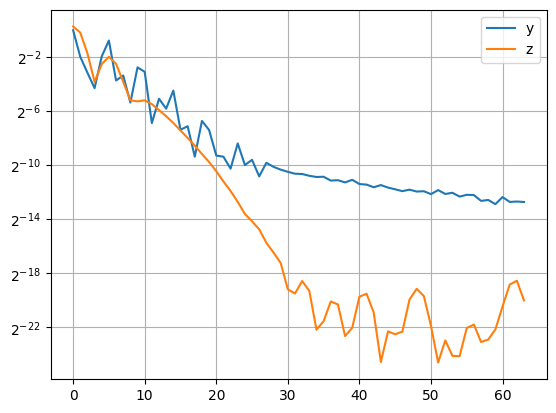

In [15]:
yspectre = rey**2 + imy**2
zspectre = rez**2 + imz**2
plt.grid()
plt.plot(yspectre, label='y')
plt.plot(zspectre, label='z')
plt.yscale('log', base = 2)
plt.legend()

In [16]:
rey, imy, rez, imz

(array([ 1.00000000e+00,  4.71264497e-01, -3.17995607e-01, -2.26108526e-01,
         4.96693894e-01,  7.04822291e-01,  1.46223056e-01, -3.08206627e-01,
        -1.17441502e-01,  2.39310305e-01,  1.97203040e-01, -8.08975263e-02,
        -1.67267180e-01, -5.70034741e-02, -9.73854727e-05, -3.46338304e-02,
        -4.46859702e-02, -3.37072125e-02, -5.76240099e-02, -6.40121204e-02,
        -7.79916326e-03,  2.72058790e-02, -1.79241994e-02, -5.43550626e-02,
        -1.02224817e-02,  3.50191167e-02,  5.13203026e-03, -3.33493652e-02,
        -7.19573696e-03,  2.77754964e-02,  5.28686015e-03, -2.50633469e-02,
        -3.59659630e-03,  2.37195500e-02,  2.60206268e-03, -2.31151846e-02,
        -2.93197107e-03,  2.12433728e-02,  1.76359778e-03, -2.14697969e-02,
        -3.16673064e-03,  1.89592083e-02,  1.90430948e-03, -1.87986563e-02,
        -2.58501392e-03,  1.68239765e-02,  1.29674415e-03, -1.67257423e-02,
        -1.25480159e-03,  1.60463209e-02,  6.44907909e-04, -1.65522235e-02,
        -1.7

In [17]:
nys = evaluate_fourier(xs, rey, imy)
nzs = evaluate_fourier(xs, rez, imz)

In [18]:
max(nys) / max(nzs) 

0.9458873376388302

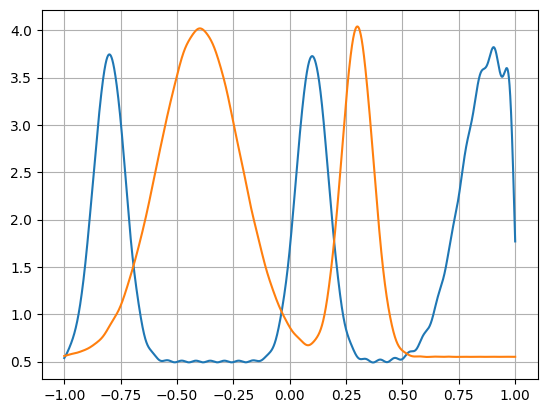

In [19]:
plt.plot(xs, nys)
plt.plot(xs, nzs)
plt.grid()

In [20]:
def construct_theta(nh, dtype=np.float64):
    hs, fs = np.pi * np.arange(nh) / 2, np.ones(nh, dtype=np.complex128)
    fs[1:] = 0.5j * (np.exp(-2j * hs[1:]) + np.exp(+2j * hs[1:]) - 2.) / hs[1:]
    return (np.real(fs).astype(dtype), np.imag(fs).astype(dtype))

In [21]:
def integral(re, im) -> tuple:
    assert im.size == re.size
    nh, dtype = re.size, re.dtype
    rt, it = construct_theta(nh, dtype)
    return (re * rt - im * it, re * it + rt * im)

In [22]:
reyint, imyint = integral(rey, imy)
rezint, imzint = integral(rez, imz)

In [23]:
reyint, imyint, rezint, imzint

(array([ 1.00000000e+00,  2.32504800e-01, -0.00000000e+00, -2.13833376e-03,
         0.00000000e+00,  7.69936644e-02,  0.00000000e+00,  9.58275772e-03,
        -0.00000000e+00,  4.27074021e-02,  0.00000000e+00,  5.14398595e-03,
         0.00000000e+00,  1.18383327e-02, -0.00000000e+00,  5.90045486e-03,
         0.00000000e+00, -1.46938305e-03, -0.00000000e+00,  2.90768075e-03,
         0.00000000e+00, -1.69296968e-03, -0.00000000e+00,  3.60729394e-04,
         0.00000000e+00, -4.19544610e-04,  0.00000000e+00, -4.31760300e-05,
         0.00000000e+00, -1.41414717e-04,  0.00000000e+00,  1.03882581e-04,
         0.00000000e+00, -1.09825453e-04,  0.00000000e+00,  1.07663409e-04,
         0.00000000e+00, -6.93757507e-05,  0.00000000e+00,  6.07607591e-05,
         0.00000000e+00, -5.74510777e-05,  0.00000000e+00,  3.25731462e-05,
         0.00000000e+00, -4.31844676e-05,  0.00000000e+00,  1.98728326e-05,
         0.00000000e+00, -2.59104836e-05,  0.00000000e+00,  9.95808337e-06,
         0.0

In [24]:
inty = evaluate_fourier(xs, reyint, imyint)
intz = evaluate_fourier(xs, rezint, imzint)

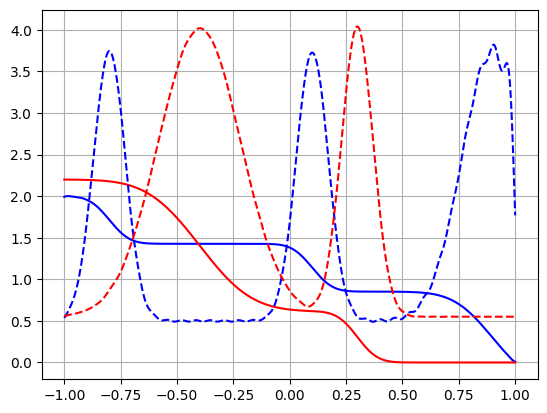

In [25]:
plt.plot(xs, inty, 'b-')
plt.plot(xs, intz, 'r-')
plt.plot(xs, nys, 'b--')
plt.plot(xs, nzs, 'r--')
plt.grid()

Gini criteria is usually defined:

$G = 1 - \sum_{c} p_c^2 = 1 - \sum_{c} n_c^2 / n^2,~n = \sum_{c} n_c$

Let's establish relation from a finite to continuous:

$G = 1 -  \sum_{c} \left( \int f_c(x) dx \right)^2 / \left( \int \sum_{c} f_c(x) dx \right)^2$

Then if we split dataset into 2 parts - A & B:

$G(A) = 1 - \sum_{c} n_c^2(A) / n^2(A),~G(B) = 1 - \sum_{c} n_c^2(B) / n^2(B)$

$G(A, B)  = G(A) \frac{n(A)}{n} + G(B) \frac{n(B)}{n} = 1 - \frac{n(A)}{n} \sum_{c} \frac{n_c^2(A)}{n^2(A)} - \frac{n(B)}{n} \sum_{c} \frac{n_c^2(B)}{n^2(B)}$

Let's specify $A = \{ x \vert x \in [-1;x_0) \},~B = \{x \vert x \in [x_0; +1)\}$, then: $n = n(A) + n (B),~n_c = n_c(A) + n_c(B)$.


We can define $n_c(A) = I_c(x_0) = \int_{-1}^{x_0} f_c(x) dx;~n_c(B) = J_c(x_0) = \int_{x_0}^{+1} f_c(x) dx = \int_{-1}^{+1} \theta(x) f_c(x) dx$ and then $n_c = J_c(-1),~n_c(A) = J_c(-1) - J_c(x_0)$

Let's rewrite:

$G(x) = 1 - \frac{\sum_c (J_c(-1) - J_c(x)}{n} \sum_c \frac{(J_c(-1) - J_c(x))^2}{n^2} - \frac{\sum_c J_c(x)}{n} \sum_c \frac{J_c^2(x)^2}{n^2}$

In [26]:
def evaluate_gini(xs, *args):
    n_classes, n = len(args), 0
    n_a, n_b = np.zeros(xs.shape), np.zeros(xs.shape)
    v_a, v_b = np.zeros(xs.shape), np.zeros(xs.shape)
  
    for (re, im) in args:
        reint, imint = integral(re, im)
        minus = np.array([-1], dtype=xs.dtype)
        jc = evaluate_fourier(xs, reint, imint)
        nc = evaluate_fourier(minus, reint, imint)
        n += float(nc)
        n_a += (float(nc) - jc)
        n_b += (float(0) + jc)
        v_a += (float(nc) - jc)**2
        v_b += (float(0) + jc)**2
    return np.ones(xs.shape) - (n_a * v_a + n_b * v_b) / n**3

In [27]:
gs = evaluate_gini(xs, (rey, imy), (rez, imz))

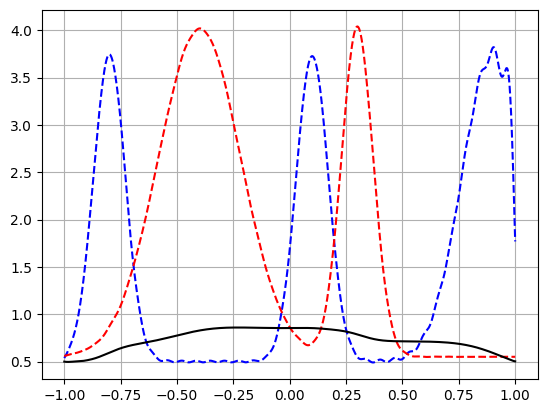

In [28]:
plt.plot(xs, nys, 'b--')
plt.plot(xs, nzs, 'r--')
plt.plot(xs, gs, 'k-')
plt.grid()

In [29]:
def evaluate_raw_gini(xs, *args):
    n = sum([len(a) for a in args])
    sg = [np.sort(a) for a in args]
    sc, xc = len(sg), len(xs)
    ids = np.zeros((sc, xc))
    for s in range(sc):
        ids[s, :] = np.searchsorted(sg[s], xs)
    n_a, n_b = np.zeros(xs.shape), np.zeros(xs.shape)
    v_a, v_b = np.zeros(xs.shape), np.zeros(xs.shape)
    for s in range(sc):
        nc = len(sg[s])
        jc = nc - ids[s, :]
        n_a += (float(nc) - jc)
        n_b += (float(0) + jc)
        v_a += (float(nc) - jc)**2
        v_b += (float(0) + jc)**2
    return np.ones(xs.shape) - (n_a * v_a + n_b * v_b) / n**3

In [30]:
rgs = evaluate_raw_gini(xs, xys, xzs)

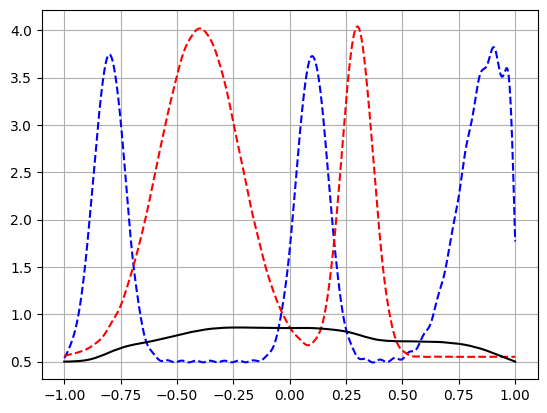

In [31]:
plt.plot(xs, nys, 'b--')
plt.plot(xs, nzs, 'r--')
plt.plot(xs, rgs, 'k-')
plt.grid()

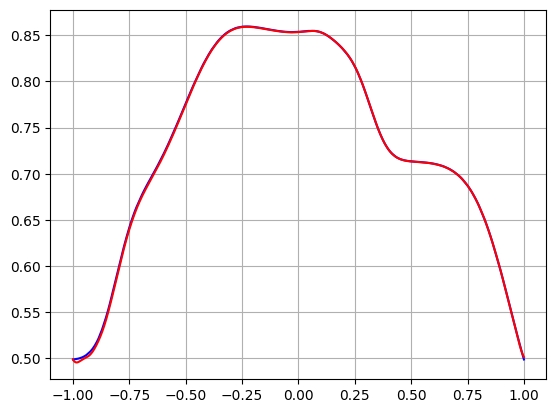

In [32]:
plt.plot(xs, rgs, 'b-')
plt.plot(xs, gs, 'r-')
plt.grid()

Difference between two computed Gini estimations:

In [33]:
np.max(np.abs(rgs - gs))

0.003896175190567841

We want to find maximum and thus should take the derivative from the function:

$\partial_x G(x) = + \frac{1}{n^3} \sum_c \partial_x J_c(x) \sum_c (n_c - J_c(x))^2 + \frac{1}{n^3} \sum_c (n_c - J_c(x)) \sum_c 2 (n_c - J_c(x))\partial_x J_c(x) - \frac{1}{n^3} \sum_c \partial_x J_c \sum_c J_c^2(x) - \frac{1}{n^3} \sum_c J_c(x) \sum_c 2 J_c(x) \partial_x J_c(x)$

Let's compute the actual derivative first:

In [34]:
def evaluate_derivative(xs, re, im):
    nh = re.size
    assert nh == im.size
    ks = np.pi * np.arange(nh) / 2
    nre, nim = +ks * im, -ks * re
    return evaluate_fourier(xs, nre, nim)

In [35]:
dery = evaluate_derivative(xs, rey, imy)
derz = evaluate_derivative(xs, rez, imz)

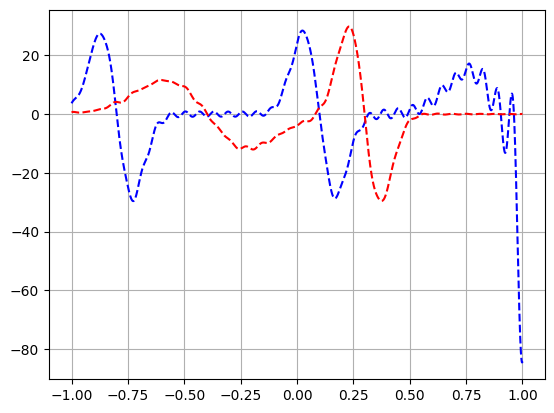

In [36]:
plt.plot(xs, dery, 'b--')
plt.plot(xs, derz, 'r--')
plt.grid()

In [37]:
def evaluate_dgini(xs, *args):
    n_classes, n = len(args), 0
    vals = [np.zeros(xs.shape) for _ in range(7)]
  
    for (re, im) in args:
        reint, imint = integral(re, im)
        minus = np.array([-1], dtype=xs.dtype)
        jc = evaluate_fourier(xs, reint, imint)
        nc = evaluate_fourier(minus, reint, imint)
        djc = evaluate_derivative(xs, reint, imint)
        n += float(nc)
        vals[0] += djc
        vals[1] += (nc - jc)**2
        vals[2] += (nc - jc)
        vals[3] += 2 * (nc - jc) * djc
        vals[4] += jc**2
        vals[5] += jc
        vals[6] += 2 * jc * djc
        
    return (n**(-3)) * (vals[0] * (vals[1] - vals[4]) + vals[2] * vals[3] - vals[5] * vals[6])

In [38]:
dgs = evaluate_dgini(xs, (rey, imy), (rez, imz))

In [39]:
from scipy.optimize import newton
grid = np.linspace(-1, 1, 32)
func = lambda x: evaluate_dgini(x, (rey, imy), (rez, imz))
results = np.mod(newton(func, grid) + 1, 2) - 1
vals = evaluate_gini(results, (rey, imy), (rez, imz))
best_idx = np.argmax(vals)
best_res, best_val = results[best_idx], vals[best_idx]

/home/nkulikov/.local/lib/python3.10/site-packages/scipy/optimize/_zeros_py.py:466: RuntimeWarning: some failed to converge after 50 iterations
  warnings.warn(msg, RuntimeWarning)


In [40]:
print(best_res, best_val)

-0.22803284467657647 0.8591886576326134


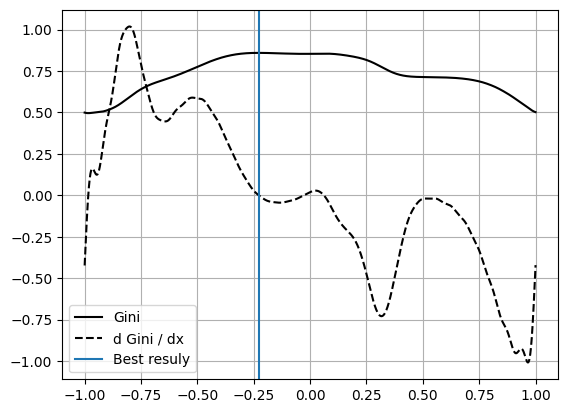

In [41]:
plt.plot(xs, gs, 'k-', label = 'Gini')
plt.plot(xs, dgs, 'k--', label = 'd Gini / dx')
plt.axvline(x = best_res, label = 'Best resuly')
plt.legend()
plt.grid()